# Q-Learning Agent

In [1]:
import numpy as np
import sys

if "../" not in sys.path:
    sys.path.append("../") 
    
from lib.envs.simple_rooms import SimpleRoomsEnv
from lib.envs.windy_gridworld import WindyGridworldEnv
from lib.envs.cliff_walking import CliffWalkingEnv
from lib.simulation import Experiment

In [2]:
class Agent(object):  
        
    def __init__(self, actions):
        self.actions = actions
        self.num_actions = len(actions)

    def act(self, state):
        raise NotImplementedError

In [3]:
class QLearningAgent(Agent):
    
    def __init__(self, actions, epsilon=0.01, alpha=0.5, gamma=1):
        super(QLearningAgent, self).__init__(actions)
        
        self.epsilon = epsilon
        self.alpha = alpha
        self.gamma = gamma
        self.Q = {}
        self.sigma = 10
       
    def stateToString(self, state):
        mystring = ""
        if np.isscalar(state):
            mystring = str(state)
        else:
            for digit in state:
                mystring += str(digit)
        return mystring    
    
    def act(self, state):
        
        stateStr = self.stateToString(state)    
        random_action = np.random.randint(0, self.num_actions) 
        
        if stateStr not in self.Q:
            best_action = random_action
            init_Q = np.random.normal(0,self.sigma)
            self.Q.update({ stateStr: np.zeros(self.num_actions) })
        else:
            qs = self.Q[stateStr]
            choices = np.where(qs==np.max(qs))[0]
            if len(choices)>1:
                best_action = np.random.choice(choices)
            else:
                best_action = choices[0]      
        

        ## Epsilon greedy policy        
        action = np.random.choice([random_action, best_action], p=np.array([ self.epsilon, 1-self.epsilon]))

            
        assert action == 0 or action == 1 or action == 2 or action == 3
        return action
    
    def learn(self, state1, action1, reward, state2, done):
       
        state1Str = self.stateToString(state1)
        state2Str = self.stateToString(state2)
        
        
        if state1Str not in self.Q:
            init_Q = np.random.normal(0,self.sigma)
            self.Q.update({ state1Str: np.zeros(self.num_actions) })
            Q_current_s = self.Q[state1Str]
        else:
            Q_current_s = self.Q[state1Str][int(action1)]
             
                
        if state2Str not in self.Q:

            init_Q = np.random.normal(0,self.sigma)
            self.Q.update({ state2Str: np.zeros(self.num_actions) })
            Q_new_s = self.Q[state2Str]
        else:
            Q_new_s = self.Q[state2Str]


        ## Q-learning update
        qmax = max([i - Q_current_s  for i in Q_new_s.tolist()])
        final_Q = Q_current_s + self.alpha * (reward + self.gamma * qmax)
        self.Q[state1Str][int(action1)] = final_Q
        
        """
        Q-learning Update:
        Q(s,a) <- Q(s,a) + alpha * (reward + gamma * max(Q(s') - Q(s,a))
        or
        Q(s,a) <- Q(s,a) + alpha * (td_target - Q(s,a))
        or
        Q(s,a) <- Q(s,a) + alpha * td_delta
        """

<IPython.core.display.Javascript object>


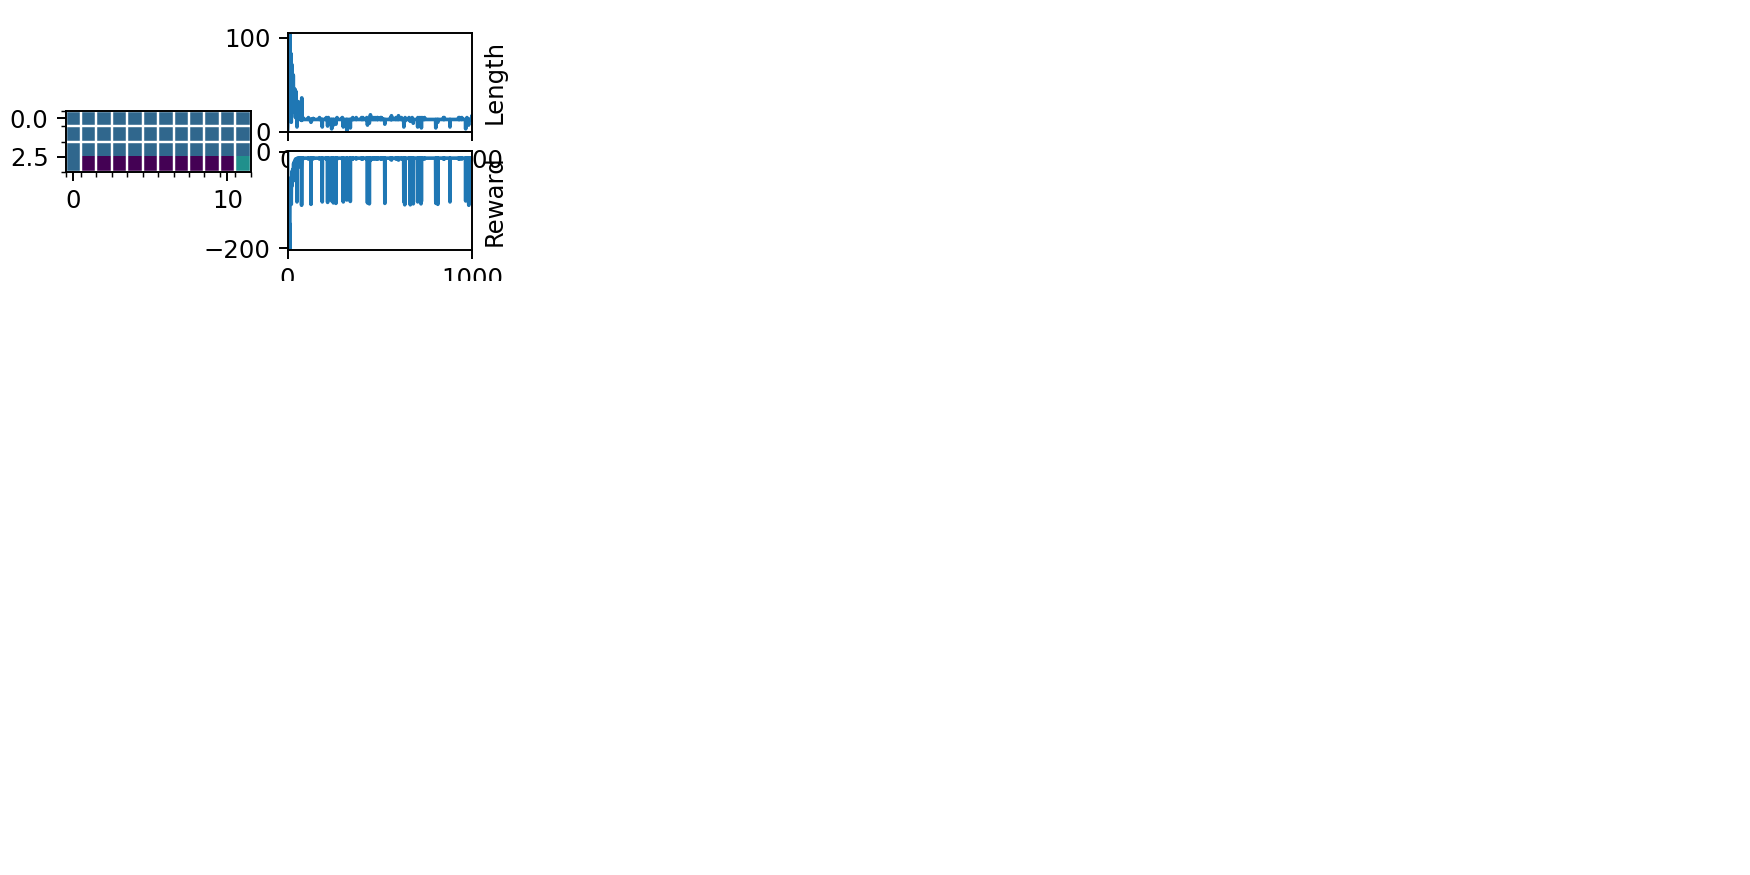

In [5]:
interactive = True
%matplotlib nbagg
env = CliffWalkingEnv()
agent = QLearningAgent(range(env.action_space.n))
experiment = Experiment(env, agent)
experiment.run_qlearning(1000, interactive)

<Figure size 1000x500 with 0 Axes>

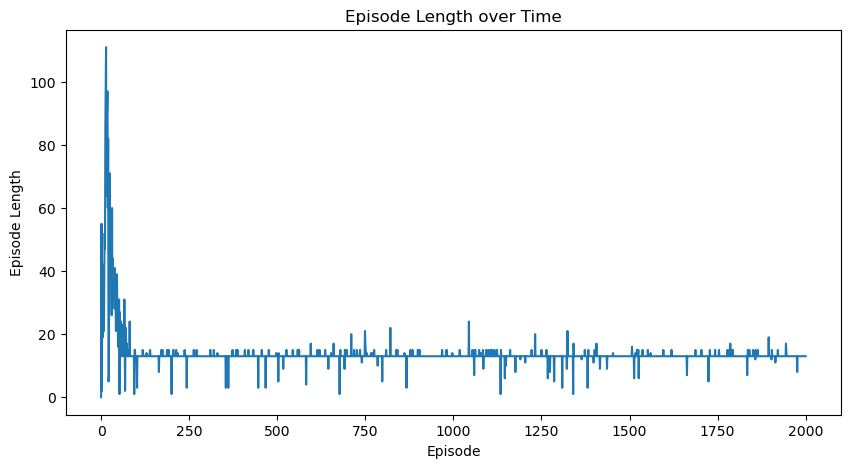

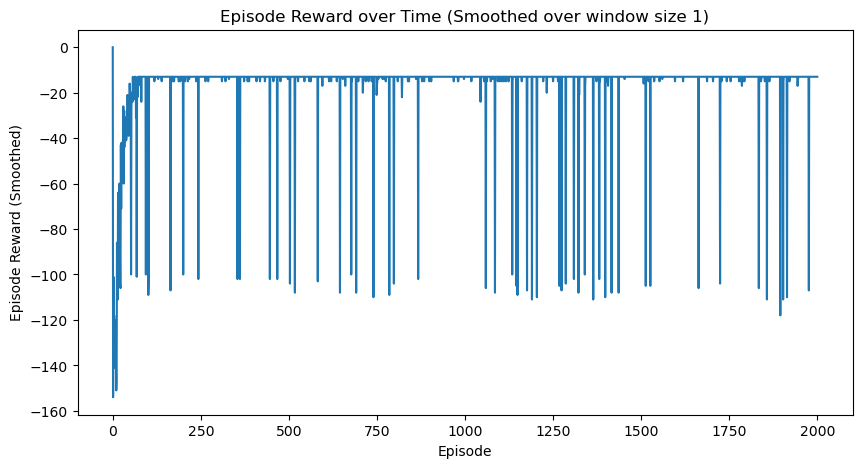

In [6]:
interactive = False
%matplotlib inline
env = CliffWalkingEnv()
agent = QLearningAgent(range(env.action_space.n))
experiment = Experiment(env, agent)
experiment.run_qlearning(2000, interactive)